# Solving a Regression Problem using ANN:

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
X = pd.DataFrame(housing.data,columns=housing.feature_names) 
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
y = pd.DataFrame(housing.target , columns=['target'])
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [6]:
X.shape

(20640, 8)

In [7]:
y.shape

(20640, 1)

In [8]:
X.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [9]:
X_train_full , X_test,y_train_full , y_test = train_test_split(X,y , random_state= 42)

X_train , X_valid ,y_train , y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

In [10]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 6)
(5160, 6)
(11610, 6)
(3870, 6)


### Architecture used:

<img src="https://github.com/entbappy/Branching-tutorial/blob/master/10.png?raw=true" width="500" 
     height="300">

In [18]:
LAYERS =[
    tf.keras.layers.Dense(30, activation='relu',input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1)
]

c:\Users\MONISH\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model = tf.keras.models.Sequential(LAYERS)

In [20]:
LOSS = 'mse'
OPTIMIZER = 'sgd'

model.compile(loss=LOSS,optimizer=OPTIMIZER)

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 30)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 581 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [23]:
EPOCHS = 20

history = model.fit(X_train ,y_train ,epochs = EPOCHS , validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3563 - val_loss: 0.9744
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5421 - val_loss: 1.5849
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4895 - val_loss: 1.0720
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4806 - val_loss: 0.6822
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4751 - val_loss: 0.4406
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4312 - val_loss: 0.4343
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4472 - val_loss: 0.4221
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4254 - val_loss: 0.4209
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4333 - val_loss: 0.4305
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4118 - val_loss: 0.4283
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4133 - val_loss: 0.4331
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [25]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.804333,0.974439
1,0.526005,1.584856
2,0.486683,1.072024
3,0.472316,0.682161
4,0.453812,0.440644
5,0.446311,0.434329
6,0.445482,0.422134
7,0.435706,0.420908
8,0.431987,0.430455
9,0.429169,0.428276


<Axes: >

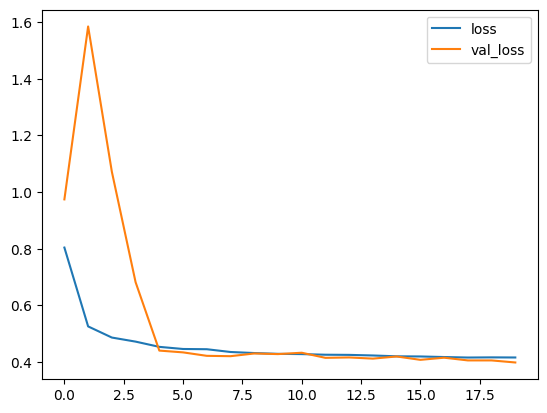

In [26]:
pd.DataFrame(history.history).plot()

In [27]:
model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4159


0.4173976182937622

In [28]:
X_test.shape

(5160, 6)

In [29]:
new = X_test[0]

In [30]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735])

In [31]:
new.shape

(6,)

In [32]:
new.reshape((1,6))

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735]])

In [33]:
model.predict(new.reshape((1,6)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[0.8833689]], dtype=float32)

Model with callbacks 

In [37]:
model_2 = tf.keras.models.Sequential(LAYERS)

LOSS = 'mse'
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)

model_2.compile(loss=LOSS,optimizer=OPTIMIZER)

EPOCHS = 20


checkpoint_cb =tf.keras.callbacks.ModelCheckpoint('my_keras_model.keras',save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir='logs')

CALLBACKS = [checkpoint_cb,early_stopping_cb,tensorboard_cb]

history = model_2.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_valid,y_valid),callbacks=CALLBACKS)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4184 - val_loss: 0.3978
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4065 - val_loss: 0.3994
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3976 - val_loss: 0.3991
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4021 - val_loss: 0.3992
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4082 - val_loss: 0.3996
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3959 - val_loss: 0.3996


In [38]:
%load_ext tensorboard

In [39]:
%tensorboard --logdir="logs"